# Debugging and Validating the Data Loader

I wrote a script to validate the data loader for the MedMNIST dataset, as I was getting weird results from the model training. I wanted to ensure that the data loader was working as expected and that the data was being loaded correctly.

Using downloaded and verified file: ./dataset_data/chestmnist_64.npz
Using downloaded and verified file: ./dataset_data/chestmnist_64.npz
Using downloaded and verified file: ./dataset_data/chestmnist_64.npz
Training Dataset Analysis:


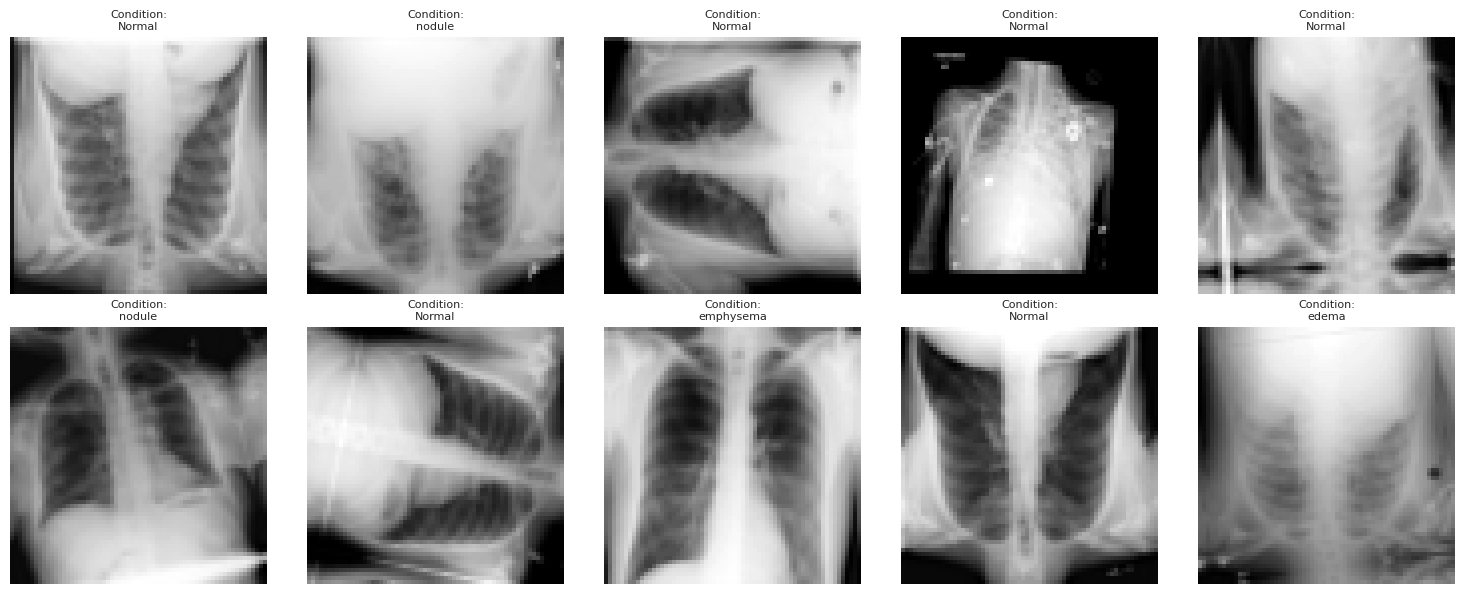

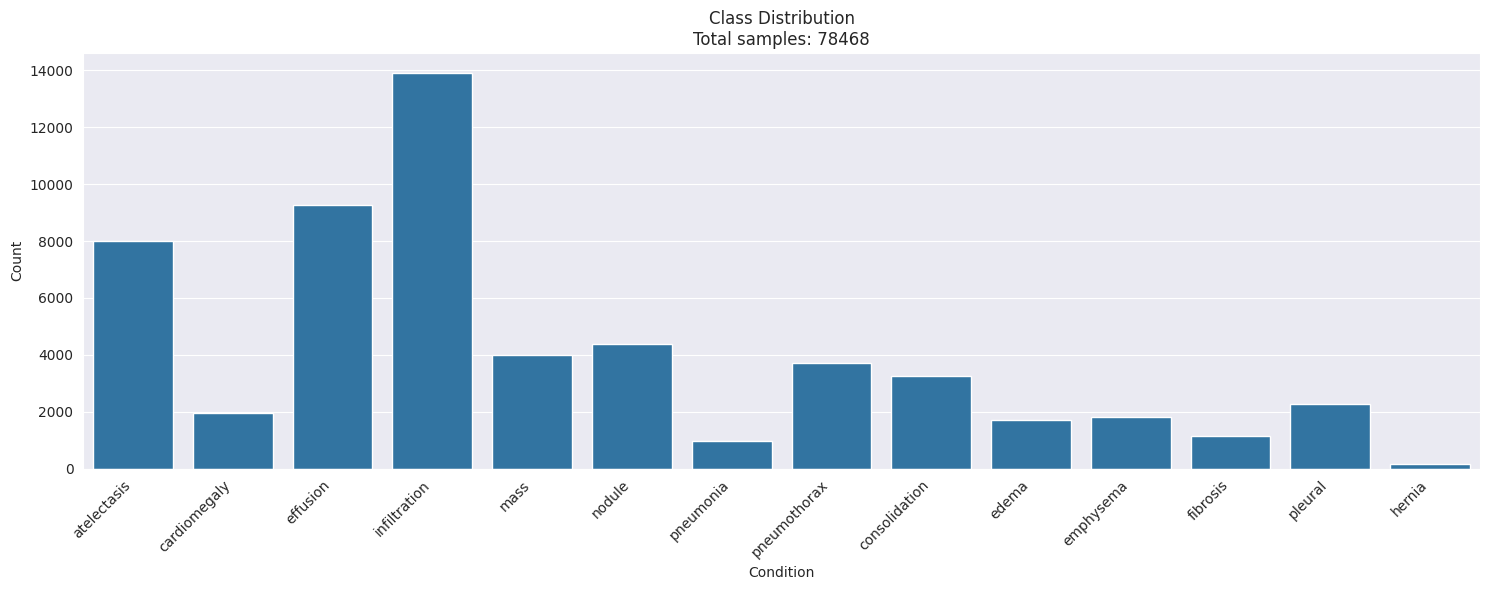


Label Statistics:
Total number of samples: 78468
atelectasis: 7996 (10.2%)
cardiomegaly: 1950 (2.5%)
effusion: 9261 (11.8%)
infiltration: 13914 (17.7%)
mass: 3988 (5.1%)
nodule: 4375 (5.6%)
pneumonia: 978 (1.2%)
pneumothorax: 3705 (4.7%)
consolidation: 3263 (4.2%)
edema: 1690 (2.2%)
emphysema: 1799 (2.3%)
fibrosis: 1158 (1.5%)
pleural: 2279 (2.9%)
hernia: 144 (0.2%)


In [3]:
from src.configs.config import PathConfig, TrainingConfig
from src.data.datamodule import ChestDataModule
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from medmnist import INFO

# Get the chest info and labels
chest_info = INFO["chestmnist"]
CHEST_CLASSES = [chest_info["label"][str(i)] for i in range(14)]


def visualize_dataloader_samples(dataloader, num_samples=10):
    """Visualize samples from a dataloader with their labels."""
    # Get a batch of samples
    images, labels = next(iter(dataloader))

    # Create a figure with subplots
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, ax in enumerate(axes.flatten()):
        if i < num_samples:
            # Get image and label
            img = images[i]
            label = labels[i]

            # Display image
            ax.imshow(img.squeeze(), cmap="gray")

            # Convert binary vector to condition names
            conditions = [CHEST_CLASSES[j] for j, v in enumerate(label) if v]
            label_text = "\n".join(conditions) if conditions else "Normal"

            ax.set_title(f"Condition:\n{label_text}", fontsize=8)
            ax.axis("off")

    plt.tight_layout()
    plt.show()


def analyze_class_distribution(dataloader):
    """Analyze and plot the class distribution in the dataset."""
    all_labels = []

    # Collect all labels
    for _, labels in dataloader:
        all_labels.append(labels.numpy())

    # Concatenate all labels
    labels_array = np.concatenate(all_labels, axis=0)
    label_counts = np.sum(labels_array, axis=0)

    # Plot distribution
    plt.figure(figsize=(15, 6))
    sns.barplot(x=CHEST_CLASSES, y=label_counts)
    plt.title(f"Class Distribution\nTotal samples: {len(labels_array)}")
    plt.xlabel("Condition")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Print statistics
    print("\nLabel Statistics:")
    print(f"Total number of samples: {len(labels_array)}")
    for i, count in enumerate(label_counts):
        percentage = (count / len(labels_array)) * 100
        print(f"{CHEST_CLASSES[i]}: {count} ({percentage:.1f}%)")


train_config = TrainingConfig(num_epochs=50)
path_config = PathConfig()

data_module = ChestDataModule(train_config, path_config)

# Analyze train dataset
print("Training Dataset Analysis:")
visualize_dataloader_samples(data_module.train_dataloader())
analyze_class_distribution(data_module.train_dataloader())

# # Analyze validation dataset
# print("\nValidation Dataset Analysis:")
# visualize_dataloader_samples(data_module.val_dataloader())
# analyze_class_distribution(data_module.val_dataloader())